# Taller E2

Laura Gutierrez
Fernando Bautista
Fredi Baron
Ingrid Hernández


In [2]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()  


In [6]:
# Lectura de serie de tiempo "Lideres sociales" en Colombia
df = pd.read_csv("C:/Users/ihernandez/Desktop/Guardar en Disco Duro/Modelos Avanzados 1/Talleres S1/lideres_sociales.csv")
df.head()

,Semana,lideres sociales: (Colombia)
0,2018-01-07,0
1,2018-01-14,0
2,2018-01-21,4
3,2018-01-28,4
4,2018-02-04,6


In [9]:
# Cambio de nombre columnas
df.columns  =["Semana", "Lideres_Sociales"]


In [10]:
# Validación de tipo fecha en variable semana
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Semana            182 non-null    object
 1   Lideres_Sociales  182 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [11]:
# Ajuste de tipo fecha en variable semana

df.Semana = pd.to_datetime(df.Semana)
df.set_index('Semana', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2018-01-07 to 2021-06-27
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Lideres_Sociales  182 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


Text(0.5, 0, 'Week')

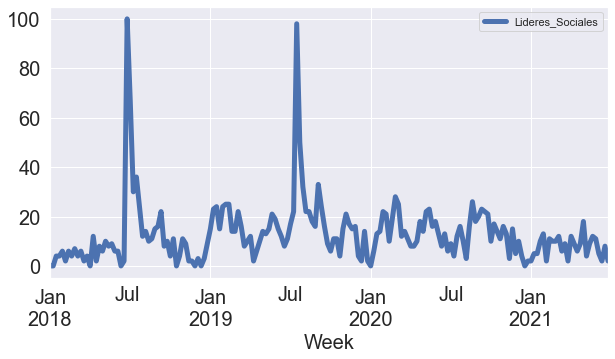

In [32]:
# Exploratory Data Analysis

df.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Week', fontsize=20)

# Is the time series stationary?

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(df['Lideres_Sociales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.314838
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [ ]:
Teniendo en cuenta el resultado anterior la serie de tiempo es estacionaria ya que se rechaza la Hipóteis Nula 

# Construct and plot the trend component of the time series

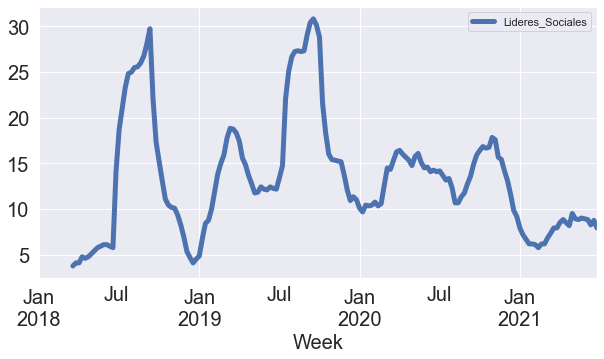

In [31]:
# Componente de tendencia

diet = df[['Lideres_Sociales']]
diet.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Week', fontsize=20);

Analizando de manera descriptiva el gráfico anterior, el comportamiento de tendencia de la serie se observa que en los dos primeros años la tendencia es positiva, pero desde el año 2020 esta empieza a bajar

# Construct and plot the seasonal component of the time series

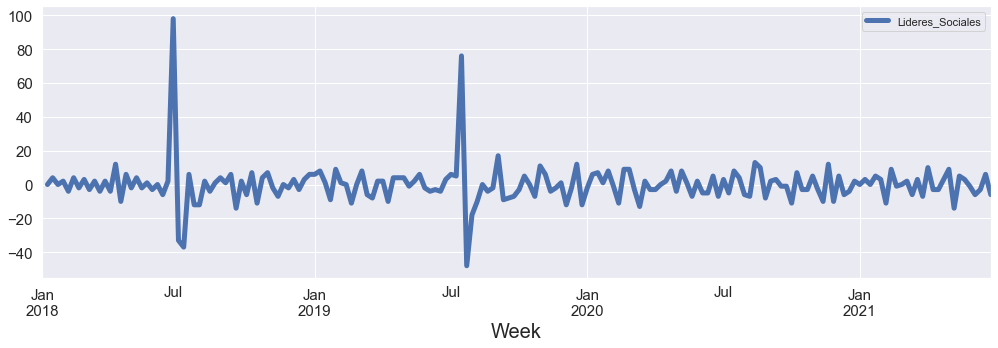

In [33]:
# Componente estacional

df.diff().plot(figsize=(17,5), linewidth=5, fontsize=15)
plt.xlabel('Week', fontsize=20);

Analizando de manera descriptiva el gráfico anterior, el comportamiento de estacionalidad de la serie se observa que en los dos primeros años se tienen los mismos picos a mitad de año, pero desde el año 2020 no se presentan patrones que se puedan identificar

# Is the detrended time series stationary?

In [34]:
result = adfuller(df['Lideres_Sociales'].diff().iloc [ 1 :]) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.500832
p-value: 0.000000
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [ ]:
Se reafirma que también el componente estacional es estacionario

# Construct a plot to analyze the autocorrelation

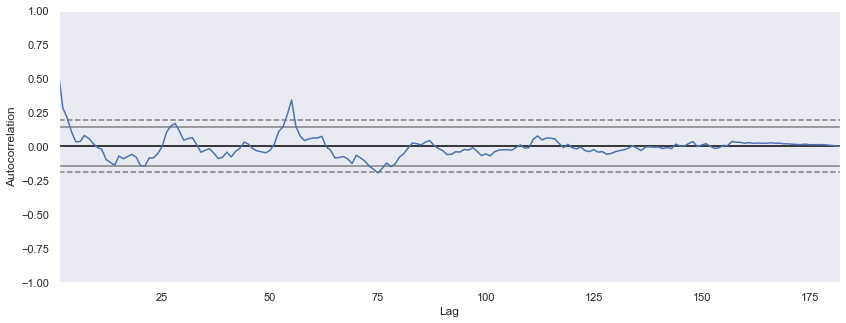

In [35]:
# Gráfico de autocorrelación

plt.figure(figsize=(14,5))
pd.plotting.autocorrelation_plot(df);

Para la serie de tiempo de lideres sociales en Colombia, no se evidencia correlación alta analizando los últimos periodos por tanto no se puede asegurar que se mantenga su mismo comportamiento.